In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("pima-indians-diabetes.csv")

In [3]:
df.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [4]:
df.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
cols_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

In [6]:
import tensorflow as tf

/home/faiz/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Feature Columns

In [7]:
num_preg = tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc = tf.feature_column.numeric_column('Glucose_concentration')
dias_press = tf.feature_column.numeric_column('Blood_pressure')
tricep = tf.feature_column.numeric_column('Triceps')
insulin = tf.feature_column.numeric_column('Insulin')
bmi = tf.feature_column.numeric_column('BMI')
diabetes_pedigree = tf.feature_column.numeric_column('Pedigree')
age = tf.feature_column.numeric_column('Age')

# Categorical Feature Columns

In [8]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])
# Alternative
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group', hash_bucket_size=10)

# Converting Contineous to Categorical 

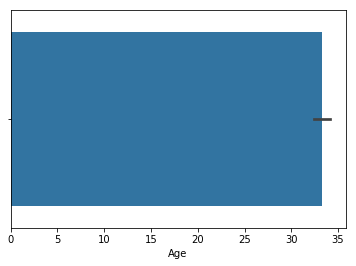

In [14]:
sns.barplot(df['Age'])

In [15]:
age_buckets = tf.feature_column.bucketized_column(age, boundaries=[20,30,40,50,60,70,80])

In [16]:
age_buckets

_BucketizedColumn(source_column=_NumericColumn(key='Age', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), boundaries=(20, 30, 40, 50, 60, 70, 80))

# Putting altogether

In [17]:
feat_cols = [num_preg ,plasma_gluc,dias_press ,tricep ,insulin,bmi,diabetes_pedigree ,assigned_group, age_buckets]

In [18]:
x_data = df.drop('Class',axis=1)

In [19]:
labels = df['Class']

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(x_data,labels,test_size=0.33, random_state=101)

In [22]:
input_func = tf.estimator.inputs.pandas_input_fn(x=X_train,y=y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [23]:
model = tf.estimator.LinearClassifier(feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp4c85eoc8', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7fbf0323f940>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [24]:
model.train(input_fn=input_func,steps=1000)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /tmp/tmp4c85eoc8/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 199.511
INFO:tensorflow:loss = 5.764628, step = 101 (0.503 sec)
INFO:tensorflow:global_step/sec: 281.049
INFO:tensorflow:loss = 5.6211286, step = 201 (0.356 sec)
INFO:tensorflow:global_step/sec: 318.914
INFO:tensorflow:loss = 6.0605054, step = 301 (0.322 sec)
INFO:tensorflow:global_step/sec: 231.813
INFO:tensorflow:loss = 6.630331, step = 401 (0.425 sec)
INFO:tensorflow:global_step/sec: 309.721
INFO:tensorflow:loss = 7.837518, step = 501 (0.321 sec)
INFO:tensorflow:global_step/sec: 295.234
INFO:tensorflow:loss = 3.8879163, step = 601 (0.339 sec)
INFO:tensorflow:global_step/sec: 306.973
INFO:tensorflow:loss = 4.752843, step = 701 (0.326 sec)
INFO:tensorflow:global_step/sec: 310.855
INFO:tensorflow:loss = 4.9918094, step = 801 (0.323 sec)
INFO:tensorflow:global_step/sec: 295.099
INFO:tensorflow:lo

In [25]:
#EValuation
eval_func = tf.estimator.inputs.pandas_input_fn(x=X_test,y=y_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
results = model.evaluate(eval_func)

INFO:tensorflow:Starting evaluation at 2018-05-19-15:29:45
INFO:tensorflow:Restoring parameters from /tmp/tmp4c85eoc8/model.ckpt-1000
INFO:tensorflow:Finished evaluation at 2018-05-19-15:29:46
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.7401575, accuracy_baseline = 0.65748036, auc = 0.78780365, auc_precision_recall = 0.62395084, average_loss = 0.5321286, global_step = 1000, label/mean = 0.34251967, loss = 5.198487, prediction/mean = 0.352526


In [28]:
results

{'accuracy': 0.7401575,
 'accuracy_baseline': 0.65748036,
 'auc': 0.78780365,
 'auc_precision_recall': 0.62395084,
 'average_loss': 0.5321286,
 'global_step': 1000,
 'label/mean': 0.34251967,
 'loss': 5.198487,
 'prediction/mean': 0.352526}

In [29]:
# Predictions
pred_input_func = tf.estimator.inputs.pandas_input_fn(
      x=X_test,
      batch_size=10,
      num_epochs=1,
      shuffle=False)